In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('aps_failure_training_set.csv')
print(df.shape)
df.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
print("Total number of Train datapoints: ",df.shape[0])
print("Total number of features: ",df.shape[1])
print("The column/feature names given are:\n ",list(df.columns))

Total number of Train datapoints:  60000
Total number of features:  171
The column/feature names given are:
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'c

# Basic Pre-Processing and Analysis

Class label Preprocessing

In [7]:
def get_correct_label(y):
    return y.replace(['neg','pos'],[0,1])


In [5]:
print(df['class'].unique())
df['class'] = get_correct_label(df['class'])
print(df['class'].unique())

['neg' 'pos']
[0 1]


# Class Distribution

Here, we will look into the distribution of our dataset. In ideal cases, we prefer a balanced dataset (equal number of positive and negative datapoints)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

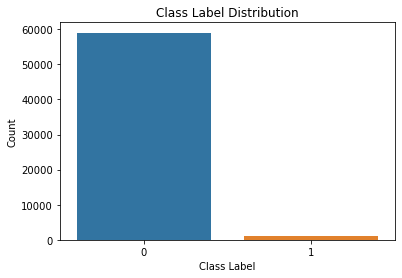

In [7]:
# Plotting the distribution of class label
sns.barplot(df['class'].unique(),df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [8]:
print('The number of positive class points is: ',df['class'].value_counts()[1])
print('The number of negative class points is: ',df['class'].value_counts()[0])

The number of positive class points is:  1000
The number of negative class points is:  59000


In [9]:
df.replace('na',np.NaN, inplace=True)

In [10]:
missing_values=df.isna().sum()
dataframe_with_null = pd.DataFrame()
dataframe_with_null['columns'] = df.columns
dataframe_with_null['missing values count'] = np.asarray(missing_values)

In [11]:
dataframe_with_null

,columns,missing values count
0,class,0
1,aa_000,0
2,ab_000,46329
3,ac_000,3335
4,ad_000,14861
...,...,...
166,ee_007,671
167,ee_008,671
168,ee_009,671
169,ef_000,2724


In [12]:
df = df[df.columns[df.isnull().mean() < 0.6]] # drop if more than 60% of the values arr missing for a column

In [13]:
df = df.apply(pd.to_numeric)

In [14]:
df.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 163, dtype: object

# Observation:

This dataset is highly imbalanced as the number of negative class points are much much more than the positive class points. We can choose to upsample the minority class datapoints, or use a modified classifier to tackle this problem.

# Checking for single value features

Out of the available features, the ones that have the same value for all datapoints do not hold much importance in improving performance of our model. Hence, we can discard those features.

We can remove the features that have standard deviation = 0


In [15]:
def constant_value(df):
    """
    This function discards columns
    that have std. deviation of 0
    meaning, all values are constant
    """
    data_n  = df.describe(include = 'all')
    col_to_drop = []
    
    for i in df.columns:
        if data_n[i]['std']==0:
            col_to_drop.append(i)
    df.drop(col_to_drop,axis=1,inplace=True)
    
    return col_to_drop

In [16]:
dropped_feature = constant_value(df)

In [17]:
print("The features that are dropped due to having a constant value (0 std. dev.) are: ",dropped_feature)
print("Shape of our feature set: ",df.shape)

The features that are dropped due to having a constant value (0 std. dev.) are:  ['cd_000']
Shape of our feature set:  (60000, 162)


In [18]:
# relacing null values with mean
for col in df.columns:
    df[col] = df[col].replace(np.NaN,df[col].mean())

In [19]:
df.isna().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 162, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sample = SMOTE()

In [22]:
X = df.drop(['class'],axis=1)
y = df['class']

In [23]:
X_bal,y_bal = sample.fit_resample(X,y)

In [24]:
X.dtypes

aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 161, dtype: object

Text(0, 0.5, 'Count')

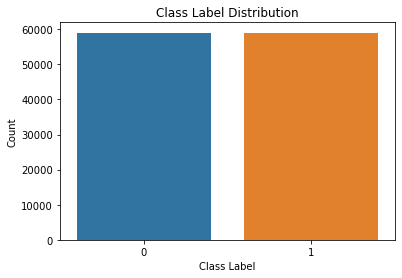

In [25]:
# Plotting the distribution of class label
sns.countplot(y_bal)
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [27]:
X_scaled = scaler.fit_transform(X_bal)

In [28]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [29]:
X_scaled

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.641659,3.110177,-0.006304,-0.069306,-0.076889,-0.055713,-0.161683,-0.305153,-0.420738,-0.510483,...,-0.316510,-0.343079,-0.429824,-0.479912,-0.484332,-0.423137,-0.324563,-0.224007,-0.040749,-0.054574
1,-0.744812,-0.467890,0.001313,-0.069306,-0.076889,-0.055713,-0.161683,-0.305153,-0.420738,-0.513195,...,-0.549814,-0.527009,-0.548691,-0.535890,-0.543610,-0.449588,-0.308267,-0.213010,-0.040749,-0.054574
2,-0.725945,-0.467890,-0.006311,-0.069306,-0.076889,-0.055713,-0.161683,-0.305153,-0.420738,-0.515566,...,-0.590835,-0.537656,-0.512374,-0.494938,-0.489643,-0.423115,-0.309905,-0.220239,-0.040749,-0.054574
3,-0.822924,-0.467890,-0.006313,-0.069306,-0.044831,-0.055713,-0.161683,-0.305153,-0.420635,-0.515486,...,-0.669771,-0.630850,-0.630183,-0.597105,-0.582160,-0.477528,-0.373564,-0.224007,0.634235,2.708947
4,-0.679063,-0.467888,-0.006297,-0.069306,-0.076889,-0.055713,-0.161683,-0.305153,-0.420738,-0.509555,...,-0.492675,-0.496837,-0.517569,-0.510499,-0.499390,-0.370246,-0.083168,-0.215077,-0.040749,-0.054574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,0.500109,0.129960,0.001313,-0.021589,-0.041604,-0.055713,-0.161683,-0.249975,-0.102915,1.002711,...,1.147577,0.419111,-0.006864,-0.258239,0.035400,2.548947,-0.048092,-0.198788,-0.025465,-0.036200
117996,1.333631,-0.467890,0.001313,-0.069306,-0.076889,-0.055713,-0.161683,-0.305153,-0.415341,-0.137778,...,1.995477,2.137677,1.999748,1.205449,1.138845,0.416404,1.128896,0.114356,-0.040749,-0.054574
117997,-0.513550,-0.467890,-0.006309,-0.069306,-0.076889,-0.055713,-0.161683,-0.303508,-0.331466,-0.115483,...,-0.449391,-0.368409,-0.269549,-0.235118,-0.068243,-0.399810,-0.368990,-0.224007,-0.040749,-0.054574
117998,0.045526,-0.467886,-0.006276,2.403858,25.275927,-0.055713,-0.157517,0.069710,-0.019529,0.478459,...,-0.074256,-0.106611,-0.079885,-0.331042,0.076316,1.959575,-0.326912,-0.223699,0.549749,2.967450


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=161)

In [31]:
pca.fit(X_scaled)

PCA(n_components=161)

In [32]:
var= pca.explained_variance_ratio_

In [33]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[28.92 35.78 40.34 43.65 46.63 49.06 51.25 53.2  55.06 56.74 58.31 59.7
 61.05 62.38 63.57 64.67 65.74 66.79 67.82 68.82 69.8  70.72 71.61 72.43
 73.24 74.01 74.76 75.49 76.21 76.91 77.59 78.26 78.91 79.54 80.16 80.78
 81.4  82.01 82.61 83.2  83.78 84.34 84.88 85.42 85.95 86.46 86.96 87.44
 87.91 88.34 88.76 89.17 89.57 89.96 90.33 90.7  91.06 91.4  91.74 92.06
 92.37 92.66 92.95 93.23 93.48 93.72 93.96 94.19 94.41 94.63 94.84 95.04
 95.24 95.44 95.62 95.8  95.97 96.13 96.29 96.44 96.59 96.74 96.88 97.02
 97.15 97.28 97.4  97.52 97.64 97.75 97.86 97.97 98.07 98.17 98.27 98.37
 98.46 98.55 98.64 98.72 98.8  98.87 98.94 99.01 99.08 99.14 99.2  99.26
 99.31 99.36 99.41 99.46 99.5  99.54 99.58 99.62 99.65 99.68 99.71 99.74
 99.76 99.78 99.8  99.82 99.84 99.86 99.87 99.88 99.89 99.9  99.91 99.92
 99.93 99.94 99.95 99.96 99.97 99.98 99.99 99.99 99.99 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99]


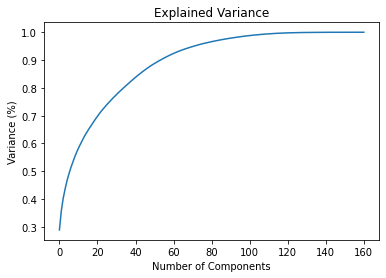

In [34]:
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [35]:
pca = PCA(n_components=104)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,index=X_scaled.index)
principal_x

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,-3.880019,-0.647550,0.110323,0.383855,0.103530,0.313643,0.316946,0.510793,-1.593252e-02,0.920738,...,-0.021868,-0.311363,0.393837,0.002066,-0.003570,-0.025777,-0.105070,0.179622,0.107261,0.119846
1,-4.953021,-0.451910,-0.284450,0.434940,0.024277,-0.144228,0.038282,0.041423,-6.711389e-07,0.134763,...,-0.049402,0.046930,-0.173033,0.042725,0.059163,-0.117475,-0.079297,0.145081,-0.152853,0.120250
2,-5.262700,-0.400037,-0.484755,0.609947,0.118568,-0.180435,-0.392435,-0.172740,-1.598227e-02,0.054327,...,-0.011448,-0.022856,-0.001306,0.024939,-0.014354,-0.025949,-0.017552,0.009867,0.009242,-0.027226
3,-5.936027,-0.306059,-0.759260,0.350765,0.170394,-0.283603,-0.309638,-0.080452,-1.243312e-02,-0.917953,...,0.031589,-0.017467,-0.001945,-0.012709,-0.019142,-0.026704,-0.020750,0.005446,-0.056069,0.011521
4,-4.581834,-0.295715,0.019312,0.232992,0.059540,-0.041633,-0.060857,0.144904,-8.615125e-03,0.438927,...,-0.022958,-0.085550,-0.009987,0.031356,-0.078482,-0.002086,-0.064283,-0.108062,-0.083797,-0.114685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,4.810655,0.036726,-2.238476,-1.188556,1.264945,-0.011479,-0.409517,2.159537,1.443021e-02,0.363888,...,0.140473,0.112299,0.641171,0.467267,-0.400204,1.000443,-0.599797,0.068176,-0.199978,0.830881
117996,10.319945,-5.972095,3.366353,2.849116,-3.995978,-2.032478,-0.528067,-1.527172,-9.603590e-03,0.465336,...,0.095300,-0.134036,0.032840,0.709557,0.315381,-0.242784,0.579584,-0.244009,0.333661,-0.288042
117997,-2.990049,0.906492,0.663906,0.551393,0.035606,-0.086758,-0.105660,0.509789,-6.315004e-03,-0.569736,...,0.162130,0.206940,0.067054,0.021728,-0.475849,0.185746,-0.259736,0.052383,0.119055,0.082234
117998,1.621136,4.519305,4.586104,0.007087,0.624604,0.752471,-4.317421,9.152191,1.079813e-01,-10.199411,...,0.405084,-0.475873,0.072600,0.700467,-0.032481,-0.320502,-0.047843,0.243170,0.067880,-0.135517


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(principal_x,y_bal,test_size = 1/3)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
param_grid_knn = {
                'algorithm': ['ball_tree', 'kd_tree'],
                'leaf_size': [10, 17, 24, 28, 30, 35],
                'n_neighbors': [4, 5, 8, 10, 11],
                'p': [1, 2]
            }

In [40]:
grid = GridSearchCV(knn,param_grid_knn, verbose=3,cv=4)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
algorithm = grid.best_params_['algorithm']
leaf_size = grid.best_params_['leaf_size']
n_neighbors = grid.best_params_['n_neighbors']
p = grid.best_params_['p']

In [41]:
# after getting best parameters
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size=10, n_neighbors=4, p=1)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)

In [47]:
y_pred = knn.predict(x_test)

In [48]:
from sklearn.metrics  import roc_auc_score,accuracy_score
accuracy_score(y_test, y_pred)

0.9922204708394773

In [2]:
import pickle

In [3]:
filename = 'C:/Users/kiran/Desktop/Final Projects/Scania APS/models/SVC/SVC.sav'

In [4]:
loaded_model = pickle.load(open(filename, 'rb'))

In [5]:
# test data
df1 = pd.read_csv('aps_failure_test_set(1).csv')
print(df1.shape)
df1.head()

(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [47]:
filename = 'C:/Users/kiran/Downloads/finalized_model.sav'

In [ ]:
pickle.dump(knn, open(filename, 'wb'))

In [48]:
loaded_model = pickle.load(open(filename, 'rb'))

In [49]:
# test data
df1 = pd.read_csv('aps_failure_test_set(1).csv')
print(df1.shape)
df1.head()

(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [8]:
df1['class'] = get_correct_label(df1['class'])
print(df1['class'].unique())

[0 1]


In [9]:
df1.replace('na',np.NaN, inplace=True)

In [10]:
df1.drop(['cd_000'],axis=1,inplace=True)

In [11]:
df1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [12]:
df1 = df1.apply(pd.to_numeric)

In [13]:
# relacing null values with mean
for col in df1.columns:
    df1[col] = df1[col].replace(np.NaN,df1[col].mean())

In [14]:
X = df1.drop(['class'],axis=1)
Y = df1['class']

In [16]:
unusedcol = ['cd_000', 'ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']

In [18]:
X.drop(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'],axis=1,inplace=True)

In [21]:
X = scaler.fit_transform(X)

In [22]:
X.shape

(16000, 161)

In [23]:
pca = PCA(n_components=104)

In [24]:
X = pca.fit_transform(X)

In [25]:
X.shape

(16000, 104)

In [26]:
y_pred2 = loaded_model.predict(X)

In [27]:
from sklearn.metrics  import roc_auc_score,accuracy_score
accuracy_score(Y,y_pred2)

0.9765